# Data Collected

In [1]:
%ls data_weather

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A48A-CA16

 D:\Workspace\bus_psngr_demand\data_weather 디렉터리

2019-11-08  오후 01:48    <DIR>          .
2019-11-08  오후 01:48    <DIR>          ..
2019-11-08  오후 01:48            45,792 weatherdata.csv
               1개 파일              45,792 바이트
               2개 디렉터리  99,507,662,848 바이트 남음


In [2]:
%ls data_airpollution

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A48A-CA16

 D:\Workspace\bus_psngr_demand\data_airpollution 디렉터리

2019-11-06  오후 07:40    <DIR>          .
2019-11-06  오후 07:40    <DIR>          ..
2019-11-06  오후 07:39            17,037 서울시 일별 평균 대기오염도 정보.xlsx
2019-11-06  오후 07:37           674,938 일별평균대기오염도_2015.xlsx
2019-11-06  오후 07:37           669,230 일별평균대기오염도_2016.xlsx
2019-11-06  오후 07:37           662,983 일별평균대기오염도_2017.xlsx
2019-11-06  오후 07:37           577,326 일별평균대기오염도_2018.xlsx
               5개 파일           2,601,514 바이트
               2개 디렉터리  99,507,662,848 바이트 남음


In [3]:
%ls data_getonoffs

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A48A-CA16

 D:\Workspace\bus_psngr_demand\data_getonoffs 디렉터리

2019-11-06  오후 06:46    <DIR>          .
2019-11-06  오후 06:46    <DIR>          ..
2019-11-06  오후 06:33       178,028,433 2015_getonoffs_per_line_stop_time.csv
2019-11-06  오후 06:33       168,684,163 2016_getonoffs_per_line_stop_time.csv
2019-11-06  오후 06:33       185,714,296 2017_getonoffs_per_line_stop_time.csv
2019-11-06  오후 06:33       175,835,828 2018_getonoffs_per_line_stop_time.csv
2019-11-06  오후 06:33        68,952,290 2019_getonoffs_per_line_stop_time(01_07).csv
2019-11-06  오후 06:33        10,328,740 2019_getonoffs_per_line_stop_time(08).csv
2019-11-06  오후 06:33        10,294,788 2019_getonoffs_per_line_stop_time(09).csv
               7개 파일         797,838,538 바이트
               2개 디렉터리  99,507,662,848 바이트 남음


# 버스정류소 위치정보 받아오기

In [4]:
import pandas as pd

df = pd.read_csv('./data_getonoffs/2019_getonoffs_per_line_stop_time(09).csv', encoding='cp949')

In [5]:
df.head()

,사용년월,노선ID,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역ID,역명,00시승차총승객수,00시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,201909,11110001,100,100번(하계동~용산구청),100000003,01003,7197,명륜3가.성대입구,2,1,...,183,213,143,220,106,218,91,75,25,20191003
1,201909,11110001,100,100번(하계동~용산구청),101000057,02156,8839,을지로입구.로얄호텔,190,27,...,82,305,44,361,37,281,40,245,40,20191003
2,201909,11110001,100,100번(하계동~용산구청),101000060,02159,8864,을지로2가.파인에빈뉴,90,13,...,65,313,32,375,33,351,40,218,35,20191003
3,201909,11110001,100,100번(하계동~용산구청),102000173,03267,8878,서빙고역교차로,1,0,...,49,16,33,14,9,10,16,14,8,20191003
4,201909,11110001,100,100번(하계동~용산구청),101000061,02160,8881,을지로3가,2,2,...,319,168,230,201,169,258,119,161,54,20191003


# 버스 노선별 위치 가져오기

In [6]:
df_busstop = pd.read_csv('./data_busstop/seoul_busstop_latlong.csv', encoding='cp949')

df_busstop.head()

,ARSID,표준ID,정류장명,X좌표,Y좌표
0,1001,100000001,종로2가사거리,126.987786,37.569764
1,1002,100000002,창경궁.서울대학교병원,126.996520,37.579179
2,1003,100000003,명륜3가.성대입구,126.998290,37.582709
3,1004,100000004,종로2가.삼일교,126.987507,37.568582
4,1005,100000005,혜화동로터리.여운형활동터,127.001694,37.586230


In [7]:
df_busstop[df_busstop['표준ID'] == 100000003]


,ARSID,표준ID,정류장명,X좌표,Y좌표
2,1003,100000003,명륜3가.성대입구,126.99829,37.582709


# 지도 그려보기

In [8]:
import folium

In [9]:
total_lines = df['노선ID'].unique()

In [10]:
stops_in_line = {}
for line_id in total_lines:
    stops_in_line[line_id] = len(df[df['노선ID']==line_id])
    
stops_in_line

{11110001: 121,
 11110002: 82,
 11110003: 69,
 11110005: 67,
 11110006: 86,
 11110007: 93,
 11110009: 87,
 11110010: 84,
 11110011: 86,
 11110012: 105,
 11110013: 105,
 11110014: 118,
 11110015: 100,
 11110016: 98,
 11110017: 134,
 11110018: 104,
 11110019: 124,
 11110020: 96,
 11110021: 130,
 11110022: 118,
 11110024: 79,
 11110027: 85,
 11110028: 102,
 11110030: 98,
 11110031: 119,
 11110032: 139,
 11110034: 122,
 11110035: 96,
 11110037: 100,
 11110038: 106,
 11110039: 93,
 11110044: 105,
 11110045: 99,
 11110046: 109,
 11110048: 71,
 11110049: 87,
 11110050: 139,
 11110052: 72,
 11110053: 57,
 11110054: 121,
 11110055: 69,
 11110056: 75,
 11110057: 83,
 11110058: 77,
 11110059: 84,
 11110060: 102,
 11110061: 125,
 11110062: 82,
 11110063: 98,
 11110065: 99,
 11110066: 102,
 11110067: 71,
 11110068: 110,
 11110069: 102,
 11110070: 102,
 11110071: 105,
 11110072: 91,
 11110073: 63,
 11110074: 23,
 11110076: 81,
 11110077: 94,
 11110078: 71,
 11110084: 25,
 11110085: 83,
 11110088: 32

In [31]:
line_w_stops = sorted(stops_in_line.items(), key=lambda x: x[1])
line_w_stops[1]

(11110388, 9)

In [32]:
df_11110388 = df[df['노선ID']==11110388]
df_11110388

,사용년월,노선ID,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역ID,역명,00시승차총승객수,00시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
17705,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000112,14203,9790,창전현대홈타운,0,0,...,4,0,0,0,0,0,0,0,0,20191003
17706,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000113,14204,9831,신촌로터리,0,0,...,6,0,0,0,0,0,0,0,0,20191003
17707,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000046,19131,71011,국회의사당,0,0,...,36,5,1,0,0,0,0,0,0,20191003
17708,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000109,14200,71012,광흥창역.서강동주민센터,0,0,...,1377,0,8,0,0,0,0,0,0,20191003
17709,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000111,14202,71013,창전현대홈타운,0,0,...,226,0,5,0,0,0,0,0,0,20191003
17710,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000195,19280,8001028,국회의사당,0,0,...,41,0,0,0,0,0,0,0,0,20191003
17711,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000047,19132,8002148,국회의사당역.국민은행,0,0,...,4,4,0,0,0,0,0,0,0,20191003
17712,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000110,14201,8002239,광흥창역.서강동주민센터,0,0,...,12,0,0,0,0,0,0,0,0,20191003
17713,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000048,19133,8002663,국회의사당역,0,0,...,41,2,2,0,0,0,0,0,0,20191003


In [33]:
df_11110388 = df[df['노선ID'] == 11110388]

df_joined = df_11110388.set_index('표준버스정류장ID').join(df_busstop.set_index('표준ID'))

In [34]:
for i in df_joined.index:
    print(i)

113000112
113000113
118000046
113000109
113000111
118000195
118000047
113000110
118000048


In [36]:
map = folium.Map(location=[df_joined['Y좌표'].mean(), df_joined['X좌표'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in df_joined.index[:-1]:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = df_joined['역명'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    icon_color = 'red'
        
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[df_joined['Y좌표'][n], df_joined['X좌표'][n]],
        radius=3,
        popup=popup_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)    

map

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df_11110388.dtypes

사용년월           int64
노선ID           int64
노선번호          object
노선명           object
표준버스정류장ID      int64
버스정류장ARS번호    object
역ID            int64
역명            object
00시승차총승객수      int64
00시하차총승객수      int64
1시승차총승객수       int64
1시하차총승객수       int64
2시승차총승객수       int64
2시하차총승객수       int64
3시승차총승객수       int64
3시하차총승객수       int64
4시승차총승객수       int64
4시하차총승객수       int64
5시승차총승객수       int64
5시하차총승객수       int64
6시승차총승객수       int64
6시하차총승객수       int64
7시승차총승객수       int64
7시하차총승객수       int64
8시승차총승객수       int64
8시하차총승객수       int64
9시승차총승객수       int64
9시하차총승객수       int64
10시승차총승객수      int64
10시하차총승객수      int64
11시승차총승객수      int64
11시하차총승객수      int64
12시승차총승객수      int64
12시하차총승객수      int64
13시승차총승객수      int64
13시하차총승객수      int64
14시승차총승객수      int64
14시하차총승객수      int64
15시승차총승객수      int64
15시하차총승객수      int64
16시승차총승객수      int64
16시하차총승객수      int64
17시승차총승객수      int64
17시하차총승객수      int64
18시승차총승객수      int64
18시하차총승객수      int64
19시승차총승객수      int64
19시하차총승객수    

In [39]:
for hr in range(0, 24):
    
    title, people_on, people_off = '', '', ''
    if hr == 0:
        title = f'{hr:02d}시총승객수'
        people_on = f'{hr:02d}시승차총승객수'
        people_off = f'{hr:02d}시하차총승객수'
    else:
        title = f'{hr}시총승객수'
        people_on = f'{hr}시승차총승객수'
        people_off = f'{hr}시하차총승객수'
        
    df_11110388[title] = df_11110388[people_on] + df_11110388[people_off]


c:\users\sewook kim\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [40]:
    
df_11110388[['00시총승객수', '00시승차총승객수', '00시하차총승객수']].head()

,00시총승객수,00시승차총승객수,00시하차총승객수
17705,0,0,0
17706,0,0,0
17707,0,0,0
17708,0,0,0
17709,0,0,0


In [41]:
df_11110388

,사용년월,노선ID,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역ID,역명,00시승차총승객수,00시하차총승객수,...,14시총승객수,15시총승객수,16시총승객수,17시총승객수,18시총승객수,19시총승객수,20시총승객수,21시총승객수,22시총승객수,23시총승객수
17705,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000112,14203,9790,창전현대홈타운,0,0,...,0,0,0,13,47,6,0,0,0,0
17706,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000113,14204,9831,신촌로터리,0,0,...,0,0,0,47,151,39,0,0,0,0
17707,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000046,19131,71011,국회의사당,0,0,...,0,0,0,347,1228,479,6,0,0,0
17708,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000109,14200,71012,광흥창역.서강동주민센터,0,0,...,0,0,0,453,3940,1388,8,0,0,0
17709,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000111,14202,71013,창전현대홈타운,0,0,...,0,0,0,70,974,226,5,0,0,0
17710,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000195,19280,8001028,국회의사당,0,0,...,0,0,0,53,284,44,0,0,0,0
17711,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000047,19132,8002148,국회의사당역.국민은행,0,0,...,0,0,0,451,2829,483,4,0,0,0
17712,201909,11110388,8761,8761번(광흥창역~국회의사당역),113000110,14201,8002239,광흥창역.서강동주민센터,0,0,...,0,0,0,71,235,46,0,0,0,0
17713,201909,11110388,8761,8761번(광흥창역~국회의사당역),118000048,19133,8002663,국회의사당역,0,0,...,0,0,0,317,1388,168,4,0,0,0


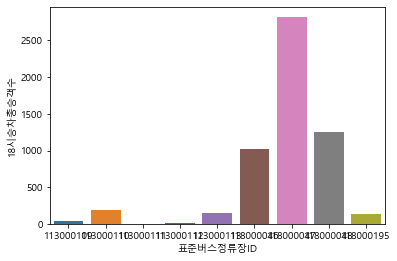

In [55]:
sns.barplot(x='표준버스정류장ID', y='18시승차총승객수', data=df_11110388)

In [56]:
len(df_11110388)

9

In [58]:
step = 10
list_df_11110388 = []
for i in range(0, len(df_11110388), step):
    list_df_11110388.append(df_11110388[i:i+step])

list_df_11110388[1]

IndexError: list index out of range

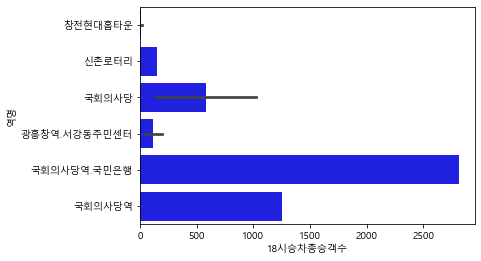

In [71]:
sns.barplot(y='역명', x='18시승차총승객수', color='b', data=df_11110388)

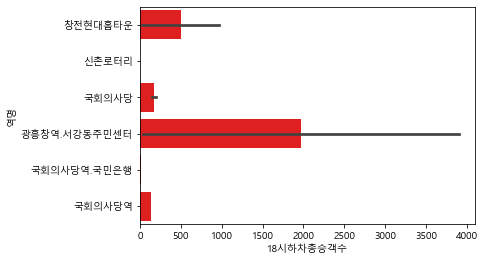

In [72]:
sns.barplot(y='역명', x='18시하차총승객수', color='r', data=df_11110388)

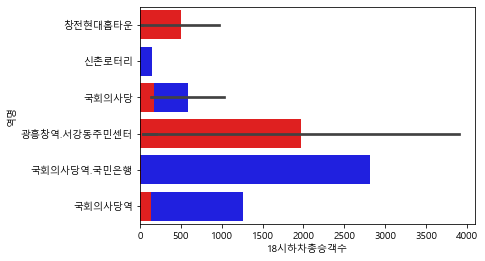

In [76]:
sns.barplot(y='역명', x='18시승차총승객수', color='b', data=df_11110388)
sns.barplot(y='역명', x='18시하차총승객수', color='r', data=df_11110388)

plt.show()

In [85]:
df_lines = pd.read_csv('./data_line/20190124_bus_lines.csv', encoding='cp949')
df_line_11110388 = df_lines[df_lines['노선명']=='8761']
df_line_11110388


,노선ID,노선명,순번,구간ID,정류소ID,ARS-ID,정류소명,X좌표,Y좌표
29697,113000001,8761,1,0,113000113,14204,신촌로터리,126.934866,37.553995
29698,113000001,8761,2,113700631,113000112,14203,창전현대홈타운,126.932408,37.550668
29699,113000001,8761,3,113700456,113000110,14201,광흥창역.서강동주민센터,126.931529,37.548106
29700,113000001,8761,4,113702679,118000195,19280,국회의사당,126.919216,37.530579
29701,113000001,8761,5,118701819,118000048,19133,국회의사당역,126.917612,37.528228
29702,113000001,8761,6,118705837,118000047,19132,국회의사당역.국민은행,126.917912,37.528135
29703,113000001,8761,7,118701432,118000046,19131,국회의사당,126.917848,37.529557
29704,113000001,8761,8,118705684,113000109,14200,광흥창역.서강동주민센터,126.931763,37.548311
29705,113000001,8761,9,113701356,113000111,14202,창전현대홈타운,126.932544,37.550686


# Candidates for Independant Variables

* Passengers on the Month of the Last Year
* Passengers on the Previous Month
* Passengers Difference between the Month of Last Year and the Previous Month of the Last Year
* Weather on the Month
* Air Pollution on the Month


# Feature Extraction